In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [3]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=1200
    sol=integrate.solve_ivp(hamilton,(0,240),(pinit_val,qinit_val),t_eval=np.linspace(0,240,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    pdot,qdot = -2*q,2*p
    return np.array([p,q,pdot,qdot])

    

In [4]:
full_p,full_q,full_pdot,full_qdot=Data(1,1)

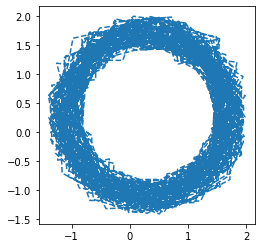

In [5]:
plt.plot(full_p,full_q,'--')
plt.axis('scaled');

In [6]:
train_p,fulltest_p=np.split(full_p,[800])
train_q,fulltest_q=np.split(full_q,[800])
train_pdot,fulltest_pdot=np.split(full_pdot,[800])
train_qdot,fulltest_qdot=np.split(full_qdot,[800])

In [7]:
test_p,new_p=np.split(fulltest_p,[200])
test_q,new_q=np.split(fulltest_q,[200])
test_pdot,new_pdot=np.split(fulltest_pdot,[200])
test_qdot,new_qdot=np.split(fulltest_qdot,[200])

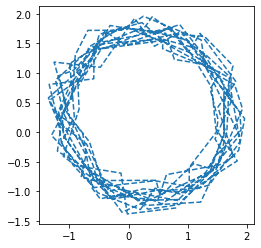

In [8]:
plt.plot(test_p,test_q,'--')
plt.axis('scaled');

In [9]:
train_list=np.array([[train_p,train_q],[train_pdot,train_qdot]])
test_list=np.array([[test_p,test_q],[test_pdot,test_qdot]])
new_list=np.array([[new_p,new_q],[new_pdot,new_qdot]])

In [10]:
# tfp= tf.constant(x)
# tfq= tf.constant(y)
# with tf.GradientTape() as g:
#     g.watch([tfp,tfq])
#     H= tfp**2+ tfq**2
#     dH_dp,dH_dq = g.gradient(H, [tfp,tfq])
#     print(dH_dp,'\n',dH_dq)

In [11]:
#def loss(ypred,ytruth):
    
    

In [12]:
# def HNN():

In [13]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(50, activation="tanh"))
myModel.add(keras.layers.Dense(50, activation="tanh"))
myModel.add(keras.layers.Dense(2, activation="softmax"))

In [14]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 2,802
Trainable params: 2,802
Non-trainable params: 0
_________________________________________________________________


In [15]:
#tf.keras.losses.mean_absolute_error
# myModel.compile(loss="mean_squared_error",
#                 optimizer="Adam",
#                 metrics=["accuracy"])

In [16]:
myModel.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer="Adam",
                metrics=["accuracy"])

In [17]:
x_train=np.transpose(train_list[0])
y_train=np.transpose(train_list[1])
x_train

array([[ 1.3292881 ,  1.18511678],
       [ 0.96030196,  1.87629015],
       [ 0.34002143,  1.94733789],
       ...,
       [ 1.38690267, -0.38009148],
       [ 1.55367335,  0.25505452],
       [ 1.6339231 ,  0.72748799]])

In [18]:
trainedModel=myModel.fit(x_train,y_train, epochs=40)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/40
25/25 [==============================] - 0s 1ms/step - loss: 3.9859 - accuracy: 0.9700
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 3.7072 - accuracy: 0.9887
Epoch 3/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6801 - accuracy: 0.9975
Epoch 4/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6728 - accuracy: 0.9925
Epoch 5/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6692 - accuracy: 0.9962
Epoch 6/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6671 - accuracy: 0.9975
Epoch 7/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6658 - accuracy: 0.9975
Epoch 8/40
25/25 [==============================] - 0s 1ms/step - loss: 3.6649 - accuracy: 0.9975
Epoch 9/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6643 - accuracy: 0.9975
Epoch 10/40
25/25 [==============================] - 0s 2ms/step - loss: 3.6639 - accuracy: 0.9975
Epoch 11/40
25/25 [

<AxesSubplot:>

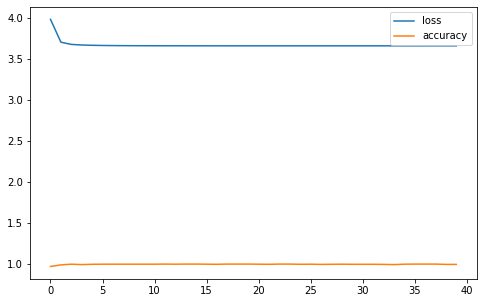

In [19]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [20]:
x_test=np.transpose(test_list[0])
y_test=np.transpose(test_list[1])

In [21]:
myModel.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 3.6680 - accuracy: 1.0000


[3.6679673194885254, 1.0]

In [22]:
newx_test=np.transpose(test_list[0])
newy_test=np.transpose(test_list[1])

In [23]:
y_pred = myModel.predict(newx_test)

In [24]:
newp,newq=test_list[1]

In [25]:
pred_pdot,pred_qdot=np.transpose(y_pred)

In [26]:
#data for predicted trajectory 1
aa=newp+pred_pdot
bb=newq+pred_qdot

#data for predicted trajectory 2
a=np.array([])
b=np.array([])
s=newp[0]
ss=newq[0]
for i in range (len(newp)):
    s=s+pred_pdot[i]
    a=np.append(a,s)
for i in range (len(newq)):
    ss=ss+pred_qdot[i]
    b=np.append(b,ss)

(-0.049990973208264226,
 1.0499027835629249,
 -0.049990973208264226,
 1.0499027835629249)

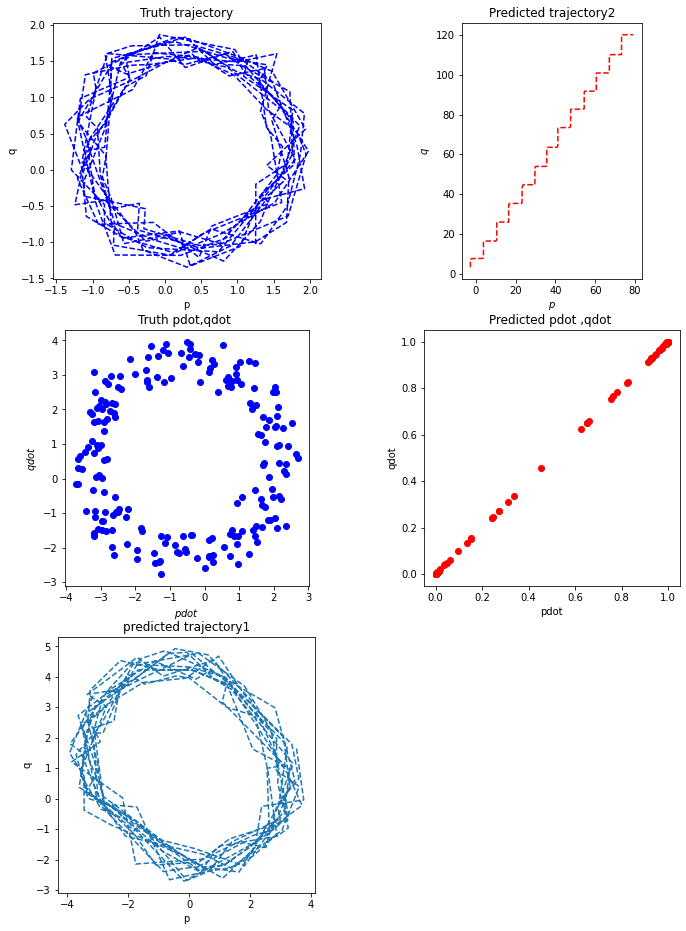

In [27]:
plt.figure(figsize=(12,16))
plt.subplot(321)
plt.plot(new_p,new_q,'b--')
plt.axis('scaled')
plt.title('Truth trajectory')
plt.xlabel('p')
plt.ylabel('q')


plt.subplot(322)
plt.plot(a,b,'r--')
plt.title('Predicted trajectory2')
plt.xlabel('$p$')
plt.ylabel('$q$');
plt.axis('scaled')

plt.subplot(323)
plt.plot(new_pdot,new_qdot,'bo')
plt.axis('scaled')
plt.title('Truth pdot,qdot ')
plt.xlabel('$pdot$')
plt.ylabel('$qdot$')

plt.subplot(325)
plt.plot(aa,bb,'--')
plt.title('predicted trajectory1')
plt.xlabel('p')
plt.ylabel('q')
plt.axis('scaled')

plt.subplot(324)
plt.plot(pred_pdot,pred_pdot,'ro')
plt.title('Predicted pdot ,qdot ')
plt.xlabel('pdot')
plt.ylabel('qdot')
plt.axis('scaled')

In [28]:
Ht=newp**2+newq**2
Hp=a**2+b**2

In [29]:
meanE=np.mean(Ht)*np.ones(200)

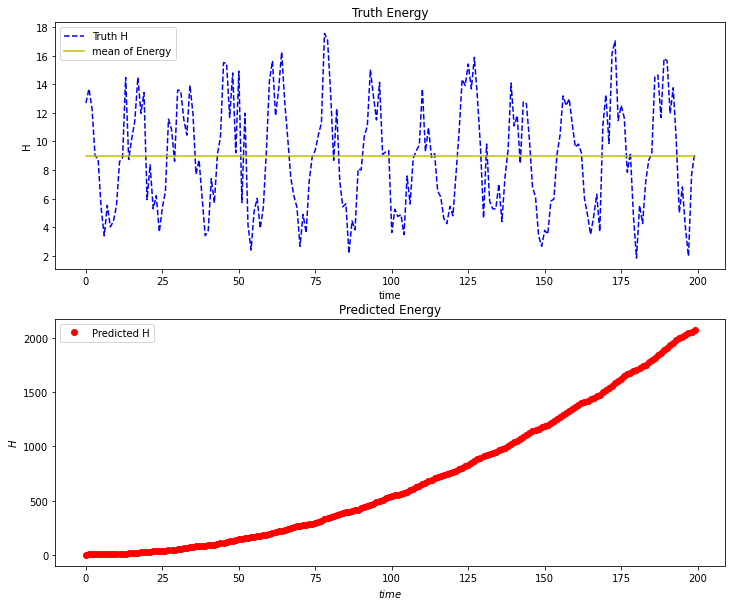

In [30]:
plt.figure(figsize=(12,10))

plt.subplot(211)
plt.plot(Ht,'b--')
plt.plot(meanE,'y')
plt.title('Truth Energy')
plt.xlabel('time')
plt.ylabel('H')
plt.legend(['Truth H','mean of Energy'])

plt.subplot(212)
plt.plot(Hp/10,'ro')
plt.title('Predicted Energy')
plt.legend(['Predicted H'])
plt.xlabel('$time$')
plt.ylabel('$H$');

